# Problem Set 8

## Fulin Guo

### 1.

#### a

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

In [2]:
q1=pd.read_csv('biden.csv')
y = q1['biden'].values
X = q1[['female','age','dem','rep','educ']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=25)

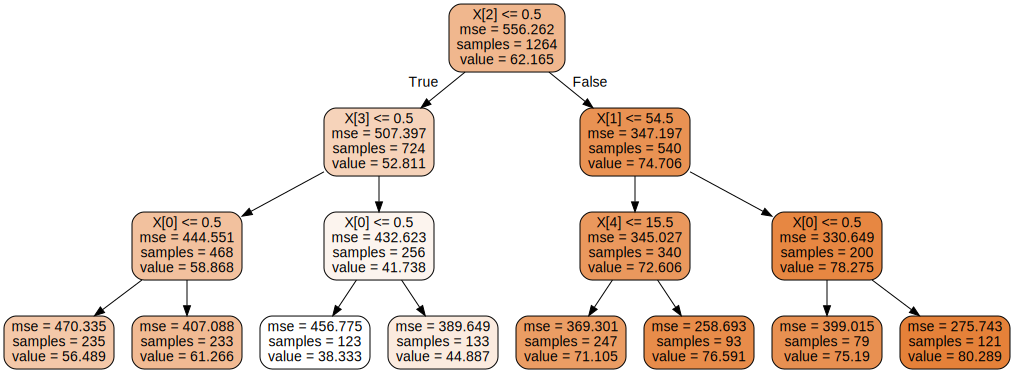

In [3]:
q1_tree=DecisionTreeRegressor(max_depth=3, min_samples_leaf=5)
q1_tree.fit(X_train, y_train)
q1_tree_viz=export_graphviz(
    q1_tree,
    out_file=None,
    rounded=True,
    filled=True,
)
graph = graphviz.Source(q1_tree_viz)
graph.render('q1_tree_viz')
graph

From the result, we could see that Democrats tend to give Joe Biden warmer feelings than non-Democrats since the four predicted values when X[3]>0.5 (Democrats) are all larger than those when X[3]<=0.5 (Non-Democrats).

In addition, among Non-Democrats, the respondents who are not Republicans tend to have warmer feeling for Joe Biden than the Non-Democrats who are Republicans.

The people that give Joe Biden highest biden are those who are Democrats, who are older than 54.5 years old, and who are female.

The people that give Joe Biden least biden are those who are non-Democrats, who are Republicans, and who are male.

The region which has the least mse is {Democrats, less than 54.5 years old, and at least 15.5 years of education).

The region which has the largest mse is {Non-Democrats, Non-Republicans, male).

In [4]:
y_pred=q1_tree.predict(X_test)
MSE1=mean_squared_error(y_test, y_pred)
print('The test MSE is:', MSE1)

The test MSE is: 396.1937146321307


#### b.

In [5]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import randint as sp_randint

In [6]:
param_dist1={'max_depth': [3, 10],
               'min_samples_split': sp_randint(2, 20),
               'min_samples_leaf': sp_randint(2, 20)}
q1tree2=DecisionTreeRegressor()
random_search1=RandomizedSearchCV(q1tree2, param_distributions=param_dist1,
                       n_iter=100, n_jobs=-1, cv=5, random_state=25,
                       scoring='neg_mean_squared_error')

In [7]:
random_search1.fit(X, y)
print('The optimal tuning parameter values are', random_search1.best_params_)
print('The MSE of the optimal results is', -random_search1.best_score_)

The optimal tuning parameter values are {'max_depth': 3, 'min_samples_leaf': 17, 'min_samples_split': 14}
The MSE of the optimal results is 401.6903602232667


#### c.

In [8]:
from sklearn.ensemble import RandomForestRegressor
q1tree3=RandomForestRegressor(random_state=25)
param_dist2={'n_estimators': [10, 200],
             'max_depth': [3, 10],
             'min_samples_split': sp_randint(2, 20),
             'min_samples_leaf': sp_randint(2, 20),
            'max_features':sp_randint(1,5)}
random_search2=RandomizedSearchCV(q1tree3, param_distributions=param_dist2,
                       n_iter=100, n_jobs=-1, cv=5, random_state=25,
                       scoring='neg_mean_squared_error')
random_search2.fit(X, y)
print('The optimal tuning parameter values are', random_search2.best_params_)
print('The MSE of the optimal results is', -random_search2.best_score_)

The optimal tuning parameter values are {'max_depth': 3, 'max_features': 3, 'min_samples_leaf': 19, 'min_samples_split': 2, 'n_estimators': 200}
The MSE of the optimal results is 397.2581460664323


### 2.

#### a.

In [9]:
from sklearn.linear_model import LogisticRegression
q2=pd.read_csv('Auto.csv',na_values='?')
q2=q2.dropna()

In [10]:
q2['mpg_high']=0
median=q2['mpg'].median()
q2['mpg_high'][(q2['mpg']>=median)]=1
q2['const']=1
q2['orgn1']=0
q2['orgn2']=0
q2['orgn1'][q2['origin']==1]=1
q2['orgn2'][q2['origin']==2]=1

/Users/fulinguo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/fulinguo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/fulinguo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [11]:
from sklearn.model_selection import KFold
Xvals=q2[['const', 'cylinders','displacement','horsepower', 'weight','acceleration', 'year', 'orgn1','orgn2']].values
yvals=q2['mpg_high'].values
kf=KFold(n_splits=4,shuffle=True,random_state=25)
kf.get_n_splits(Xvals)
MSE_vec_kf=np.zeros(4)
err0=np.zeros(4)
err1=np.zeros(4)
k_ind=int(0)
for train_index, test_index in kf.split(Xvals):
    X_train, X_test=Xvals[train_index], Xvals[test_index]
    y_train, y_test=yvals[train_index], yvals[test_index]
    LogReg = LogisticRegression()
    LogReg.fit(X_train, y_train)
    y_pred = LogReg.predict(X_test)
    MSE_vec_kf[k_ind] = ((y_test - y_pred) ** 2).mean()
    err0[k_ind]=sum(((y_test!=y_pred)&(y_test==0)))/sum(y_test==0)
    err1[k_ind]=sum(((y_test!=y_pred)&(y_test==1)))/sum(y_test==1)
    k_ind += 1

MSE_kf = MSE_vec_kf.mean()
averr0=err0.mean()
averr1=err1.mean()
print('The MSE of the model is:', MSE_kf)
print('The error rates for mpg_high=0 is:',averr0)
print('The error rates for mpg_high=1 is:',averr1)

The MSE of the model is: 0.09948979591836735
The error rates for mpg_high=0 is: 0.1193288810332874
The error rates for mpg_high=1 is: 0.07794684205076569


/Users/fulinguo/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/fulinguo/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/fulinguo/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/fulinguo/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### b.

In [12]:
from sklearn.ensemble import RandomForestClassifier
q2tree1=RandomForestClassifier()
param_dist3 = {'n_estimators': [10, 200],
             'max_depth': [3, 8],
             'min_samples_split': sp_randint(2, 20),
             'min_samples_leaf': sp_randint(2, 20),
             'max_features': sp_randint(1, 8)}
random_search3=RandomizedSearchCV(q2tree1, param_distributions=param_dist3,
                       n_iter=100, n_jobs=-1, cv=4, random_state=25,
                       scoring='neg_mean_squared_error')
random_search3.fit(Xvals, yvals)
print('The optimal tuning parameter values are', random_search3.best_params_)
print('The MSE of the optimal results are', -random_search3.best_score_)

The optimal tuning parameter values are {'max_depth': 8, 'max_features': 2, 'min_samples_leaf': 12, 'min_samples_split': 4, 'n_estimators': 10}
The MSE of the optimal results are 0.08418367346938775


#### c.

In [13]:
from sklearn import svm
from scipy.stats import uniform as sp_uniform
q2svm1=svm.SVC(kernel='rbf')
param_dist4 = {'C': sp_uniform(loc=0.2, scale=4.0),
             'gamma': ['scale', 'auto'],
             'shrinking': [True, False]}
random_search4=RandomizedSearchCV(q2svm1, param_distributions=param_dist4,
                       n_iter=100, n_jobs=-1, cv=4, random_state=25,
                       scoring='neg_mean_squared_error')
random_search4.fit(Xvals, yvals)
print('The optimal tuning parameter values are', random_search4.best_params_)
print('The MSE of the optimal results are', -random_search4.best_score_)

The optimal tuning parameter values are {'C': 1.1775180640974197, 'gamma': 'scale', 'shrinking': False}
The MSE of the optimal results are 0.11734693877551021


#### d.

I think the random forest model (part(b)) is the best because the MSE of the random forest model is the least among the three models.